# 🚀 AI Challenge: Smart Resume-to-Job Matching System

Kjo është një sfidë në 3 faza që do t'ju udhëheqë nga analiza fillestare deri tek ndërtimi i një modeli AI për përputhjen e CV-ve me përshkrimet e punës (JDs).

## 🔹 Detyra 1: Analiza dhe Përpunimi i të Dhënave

***Niveli:*** Fillestar

***Objektivat:***
- Eksploroni datasetin e CV-ve dhe JD-ve
- Pastroni të dhënat tekstuale
- Nxirrni karakteristika të thjeshta NLP

In [1]:
!pip install pandas numpy matplotlib seaborn nltk scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Text processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# ML  libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Download required NLTK data
# nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
# nltk.download('averaged_perceptron_tagger', quiet=True)

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [3]:
# Load the datasets
resume_df = pd.read_csv('Challenge-Data/Resume.csv')
jd_df = pd.read_csv('Challenge-Data/JDs.csv')

print(f"Resume dataset: {resume_df.shape}")
print(f"Job Description dataset: {jd_df.shape}")

Resume dataset: (2484, 4)
Job Description dataset: (853, 5)


In [4]:
resume_df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
# Resume dataset overview
print(resume_df.info())
print("\n")
print(f"\nMissing values:")
print(resume_df.isnull().sum())
print("\n")
print(f"\nUnique categories:")
print(resume_df['Category'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB
None



Missing values:
ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64



Unique categories:
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR         

No missing values for the resume dataset.

In [6]:
jd_df.head()

,company_name,job_description,position_title,description_length,model_response
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,"{\n ""Core Responsibilities"": ""Responsible fo..."
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,"{\n ""Core Responsibilities"": ""as an asc you ..."
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,"{\n ""Core Responsibilities"": ""Help drive bus..."
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{\n ""Core Responsibilities"": ""Designing webs..."
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,"{\n ""Core Responsibilities"": ""Build and layo..."


In [7]:
# JD dataset overview
print(jd_df.info())
print("\n")
print(f"\nMissing values:")
print(jd_df.isnull().sum())
print("\n")
print(f"\nUnique categories:")
print(jd_df['description_length'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   company_name        853 non-null    object
 1   job_description     853 non-null    object
 2   position_title      853 non-null    object
 3   description_length  853 non-null    int64 
 4   model_response      853 non-null    object
dtypes: int64(1), object(4)
memory usage: 33.4+ KB
None



Missing values:
company_name          0
job_description       0
position_title        0
description_length    0
model_response        0
dtype: int64



Unique categories:
count      853.000000
mean      3335.600234
std       2094.794724
min         14.000000
25%       1961.000000
50%       3078.000000
75%       4404.000000
max      23924.000000
Name: description_length, dtype: float64


Again, no missing values here neither.

In [8]:
# Statistical analysis of CV and JD categories

# Resume categories analysis
resume_category_counts = resume_df['Category'].value_counts()
print("Resume categories distribution:")
print(resume_category_counts)

# Job description companies analysis
jd_company_counts = jd_df['company_name'].value_counts()
print(f"\nTop 10 companies by number of job postings:")
print(jd_company_counts.head(10))

# Position titles analysis
jd_position_counts = jd_df['position_title'].value_counts()
print(f"\nTop 10 most common position titles:")
print(jd_position_counts.head(10))

Resume categories distribution:
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

Top 10 companies by number of job postings:
company_name
Google                                                                                  1
The Computer Merchant, Ltd                                       

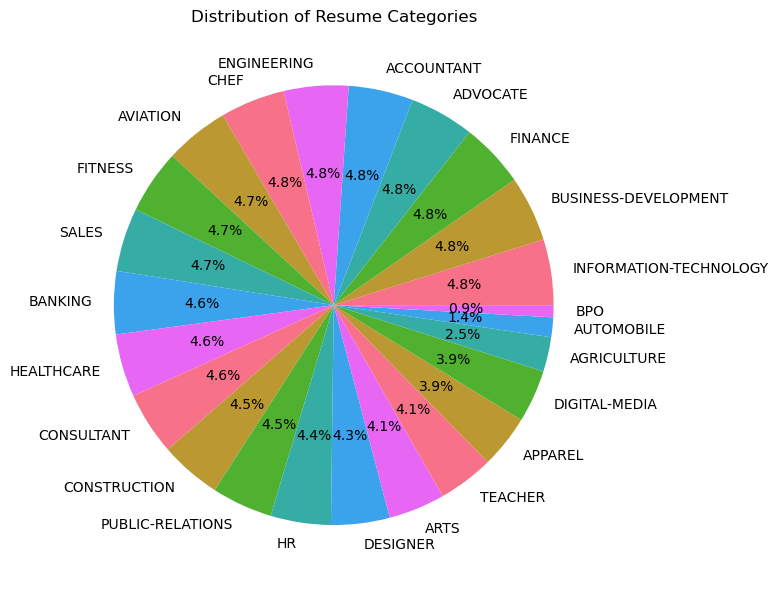

In [9]:
# Distribution of Resume Categories
plt.figure(figsize=(8, 6))
plt.pie(
    resume_category_counts.values,
    labels=resume_category_counts.index,
    autopct='%1.1f%%'
)
plt.title('Distribution of Resume Categories')
plt.tight_layout()
plt.show()

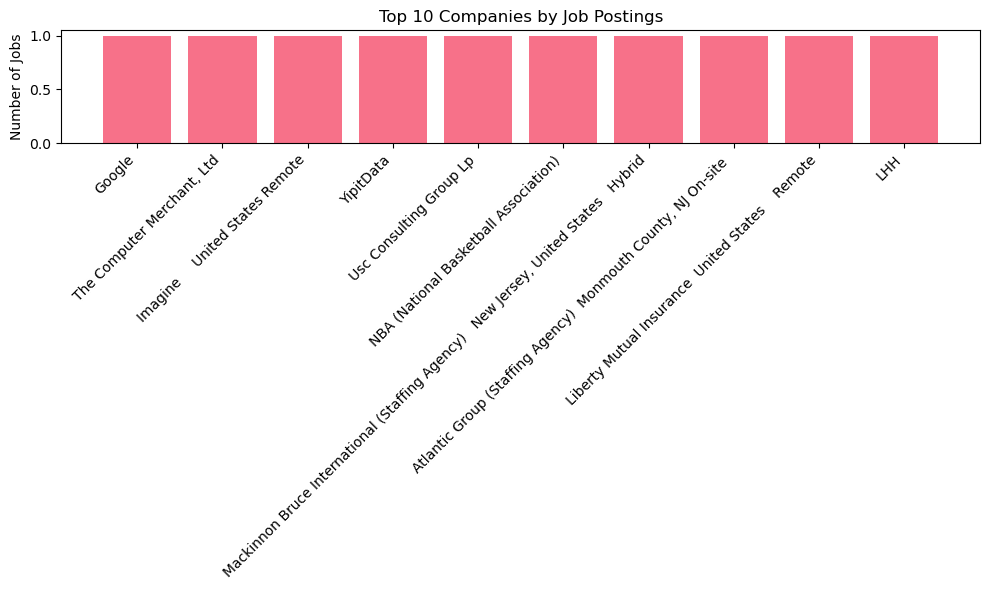

In [10]:
# Top 10 Companies by Job Postings
top_companies = jd_company_counts.head(10)
plt.figure(figsize=(10, 6))
plt.bar(
    range(len(top_companies)),
    top_companies.values
)
plt.xticks(
    range(len(top_companies)),
    top_companies.index,
    rotation=45,
    ha='right'
)
plt.ylabel('Number of Jobs')
plt.title('Top 10 Companies by Job Postings')
plt.tight_layout()
plt.show()

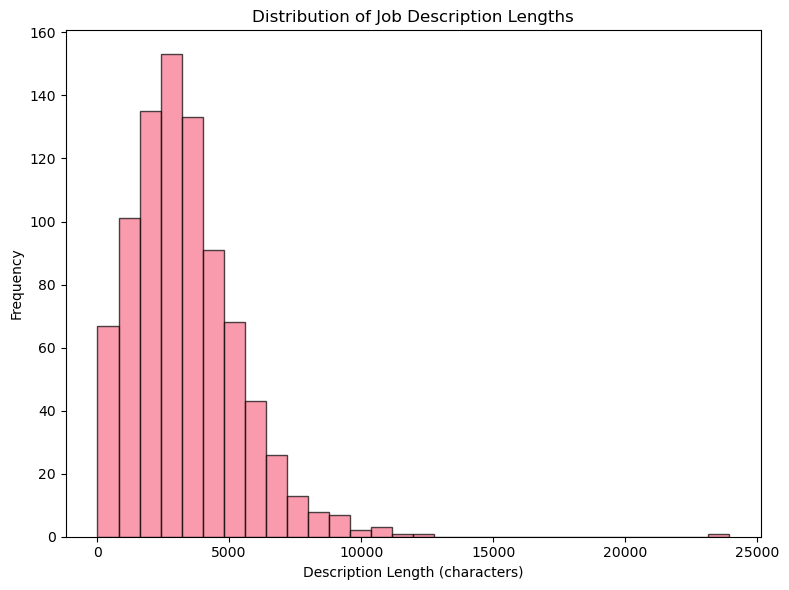

In [11]:
# Distribution of Job Description Lengths
plt.figure(figsize=(8, 6))
plt.hist(
    jd_df['description_length'],
    bins=30,
    alpha=0.7,
    edgecolor='black'
)
plt.xlabel('Description Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Job Description Lengths')
plt.tight_layout()
plt.show()

The distribution of job description lengths is unimodal and right-skewed, with a concentration around 3,000 characters.

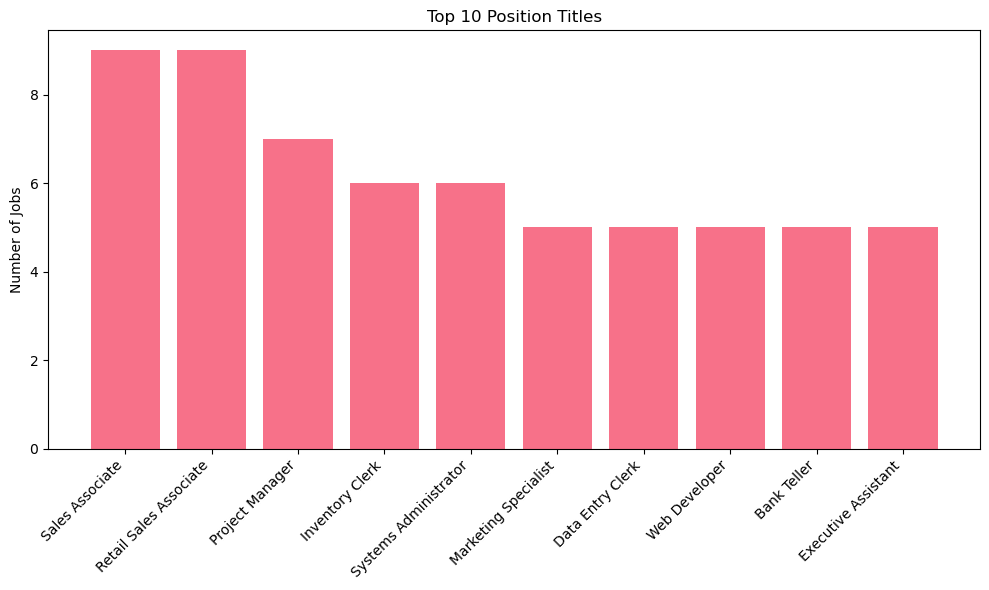

In [12]:
# Top 10 Position Titles
top_positions = jd_position_counts.head(10)
plt.figure(figsize=(10, 6))
plt.bar(
    range(len(top_positions)),
    top_positions.values
)
plt.xticks(
    range(len(top_positions)),
    top_positions.index,
    rotation=45,
    ha='right'
)
plt.ylabel('Number of Jobs')
plt.title('Top 10 Position Titles')
plt.tight_layout()
plt.show()

In [13]:
# Text preprocessing functions with enhanced stopword removal
class TextPreprocessor:
    def __init__(self):
        # Original NLTK stopwords
        self.stop_words = set(stopwords.words('english'))
        
        # Additional custom stopwords as specified
        custom_stopwords = {
            "the", "or", "and", "a", "an", "as", "be", "can", "in", "of", "on", "for", "to", "with", "by", 
            "we", "will", "company", "name", "skill", "city", "state", "education", "experience", 
            "provide", "team", "time", "work", "responsibility", "other", "ensure", "include",
            "job", "apply", "need", "store", "that", "base", "benefit", "employee", "analytical", 
            "business", "development", "sale", "engineering", "you", "all", "at", "from", "have", 
            "this", "it", "not", "s"
        }
        
        # Combine both sets of stopwords
        self.stop_words.update(custom_stopwords)
        
        self.lemmatizer = WordNetLemmatizer()
        
    def get_wordnet_pos(self, word): # Map POS tag to first character lemmatizer expects
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)
    
    def clean_text(self, text): # Clean text by removing special characters, digits, and extra whitespace
        if pd.isna(text): 
            return ""
        
        # Convert to lowercase
        text = text.lower()
        
        # Remove HTML tags
        text = re.sub(r'<[^>]+>', '', text)
        
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        
        # Remove email addresses
        text = re.sub(r'\S+@\S+', '', text)
        
        # Remove phone numbers
        text = re.sub(r'\+?\d[\d\s\-\(\)]+', '', text)
        
        # Remove non-ASCII characters
        text = re.sub(r'[^\x00-\x7F]+', '', text)
        
        # Remove punctuation and digits
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\d+', '', text)
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    
    def tokenize_and_lemmatize(self, text): # Tokenize text and lemmatize words
        if not text:
            return []
        
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stopwords and lemmatize
        processed_tokens = []
        for token in tokens:
            if token not in self.stop_words and len(token) > 2:
                lemmatized = self.lemmatizer.lemmatize(token, self.get_wordnet_pos(token))
                processed_tokens.append(lemmatized)
        
        return processed_tokens
    
    def preprocess_text(self, text): # Complete preprocessing pipeline
        cleaned = self.clean_text(text)
        tokens = self.tokenize_and_lemmatize(cleaned)
        return ' '.join(tokens)

# Initialize preprocessor with enhanced stopwords and clean the data
preprocessor = TextPreprocessor()

# Preprocess resume data
resume_df['cleaned_resume'] = resume_df['Resume_str'].apply(preprocessor.preprocess_text)

# Preprocess job description data
jd_df['cleaned_job_description'] = jd_df['job_description'].apply(preprocessor.preprocess_text)

print(f"Total stopwords being filtered: {len(preprocessor.stop_words)}")

# Check preprocessing results
print(resume_df['cleaned_resume'].iloc[0][:500])

print(jd_df['cleaned_job_description'].iloc[0][:500])

Total stopwords being filtered: 224
administrator marketing associate administrator summary dedicate customer service manager year hospitality customer service management respect builder leader customer focus team strives instill share enthusiastic commitment customer service highlight focus customer satisfaction management marketing savvy conflict resolution technique training skilled multi tasker client relation specialist accomplishment missouri dot supervisor training certification certify ihg customer loyalty marketing segmen
minimum qualification bachelor degree equivalent practical year saas productivity tool businessexperience manage enterprise account sale cycle prefer qualification year building strategic partnership enterprise customersability reseller ecosystem scale businessability plan pitch execute territory strategyability build relationship deliver result crossfunctionalmatrixed environmentability identify crosspromoting uppromoting opportunity within exist account bas

In [14]:
# Initialize preprocessor and clean the data
preprocessor = TextPreprocessor()

# Preprocess resume data
resume_df['cleaned_resume'] = resume_df['Resume_str'].apply(preprocessor.preprocess_text)

# Preprocess job description data
jd_df['cleaned_job_description'] = jd_df['job_description'].apply(preprocessor.preprocess_text)

# Check preprocessing results
print("\nSample of cleaned resume text:")
print(resume_df['cleaned_resume'].iloc[0][:500])

print("\nSample of cleaned job description text:")
print(jd_df['cleaned_job_description'].iloc[0][:500])


Sample of cleaned resume text:
administrator marketing associate administrator summary dedicate customer service manager year hospitality customer service management respect builder leader customer focus team strives instill share enthusiastic commitment customer service highlight focus customer satisfaction management marketing savvy conflict resolution technique training skilled multi tasker client relation specialist accomplishment missouri dot supervisor training certification certify ihg customer loyalty marketing segmen

Sample of cleaned job description text:
minimum qualification bachelor degree equivalent practical year saas productivity tool businessexperience manage enterprise account sale cycle prefer qualification year building strategic partnership enterprise customersability reseller ecosystem scale businessability plan pitch execute territory strategyability build relationship deliver result crossfunctionalmatrixed environmentability identify crosspromoting uppromoting

In [15]:
# Check preprocessing results

for i in range(10):
    print(f"\nSample of cleaned resume {i} text:")
    print(resume_df['cleaned_resume'].iloc[i][:1000])

    print(f"\nSample of cleaned job description {i} text:")
    print(jd_df['cleaned_job_description'].iloc[i][:1000])


Sample of cleaned resume 0 text:
administrator marketing associate administrator summary dedicate customer service manager year hospitality customer service management respect builder leader customer focus team strives instill share enthusiastic commitment customer service highlight focus customer satisfaction management marketing savvy conflict resolution technique training skilled multi tasker client relation specialist accomplishment missouri dot supervisor training certification certify ihg customer loyalty marketing segment hilton worldwide general manager training certification accomplish trainer cross server hospitality system hilton onq micros opera pm fidelio opera reservation system or holidex complete course seminar customer service sale strategy inventory control loss prevention safety management leadership performance assessment administrator marketing associate administrator dec current help develop policy directs coordinate activity employment compensation labor relatio

In [16]:
# Word frequency analysis by job category from a list of texts
def get_word_frequencies(texts, top_n=20):
    all_words = []
    for text in texts:
        if pd.notna(text) and text:
            all_words.extend(text.split())
    
    word_freq = Counter(all_words)
    return word_freq.most_common(top_n)

# Analyze word frequencies by resume category
categories = resume_df['Category'].unique()

word_freq_by_category = {}
for category in categories:
    category_resumes = resume_df[resume_df['Category'] == category]['cleaned_resume']
    word_freq_by_category[category] = get_word_frequencies(category_resumes, top_n=15)
    
    print(f"\nTop 15 words in {category}:")
    for word, freq in word_freq_by_category[category]:
        print(f"{word}: {freq}")


Top 15 words in HR:
management: 949
resource: 616
human: 595
process: 529
training: 514
employee: 494
new: 457
program: 454
manager: 435
hire: 426
staff: 410
policy: 398
benefit: 388
skill: 376
manage: 345

Top 15 words in DESIGNER:
design: 1281
designer: 565
project: 446
create: 323
product: 313
client: 313
graphic: 296
customer: 289
skill: 273
art: 264
use: 263
work: 243
management: 227
new: 221
material: 216

Top 15 words in INFORMATION-TECHNOLOGY:
system: 1325
management: 898
information: 855
technology: 818
support: 782
network: 751
project: 707
server: 568
data: 557
software: 542
application: 444
service: 443
manage: 440
security: 434
database: 407

Top 15 words in TEACHER:
student: 1114
teacher: 707
child: 427
school: 400
skill: 399
learn: 361
classroom: 330
plan: 309
lesson: 291
activity: 278
teach: 277
parent: 256
program: 243
maintain: 241
service: 213

Top 15 words in ADVOCATE:
customer: 1006
service: 811
skill: 512
client: 482
management: 479
patient: 413
sale: 339
maintai

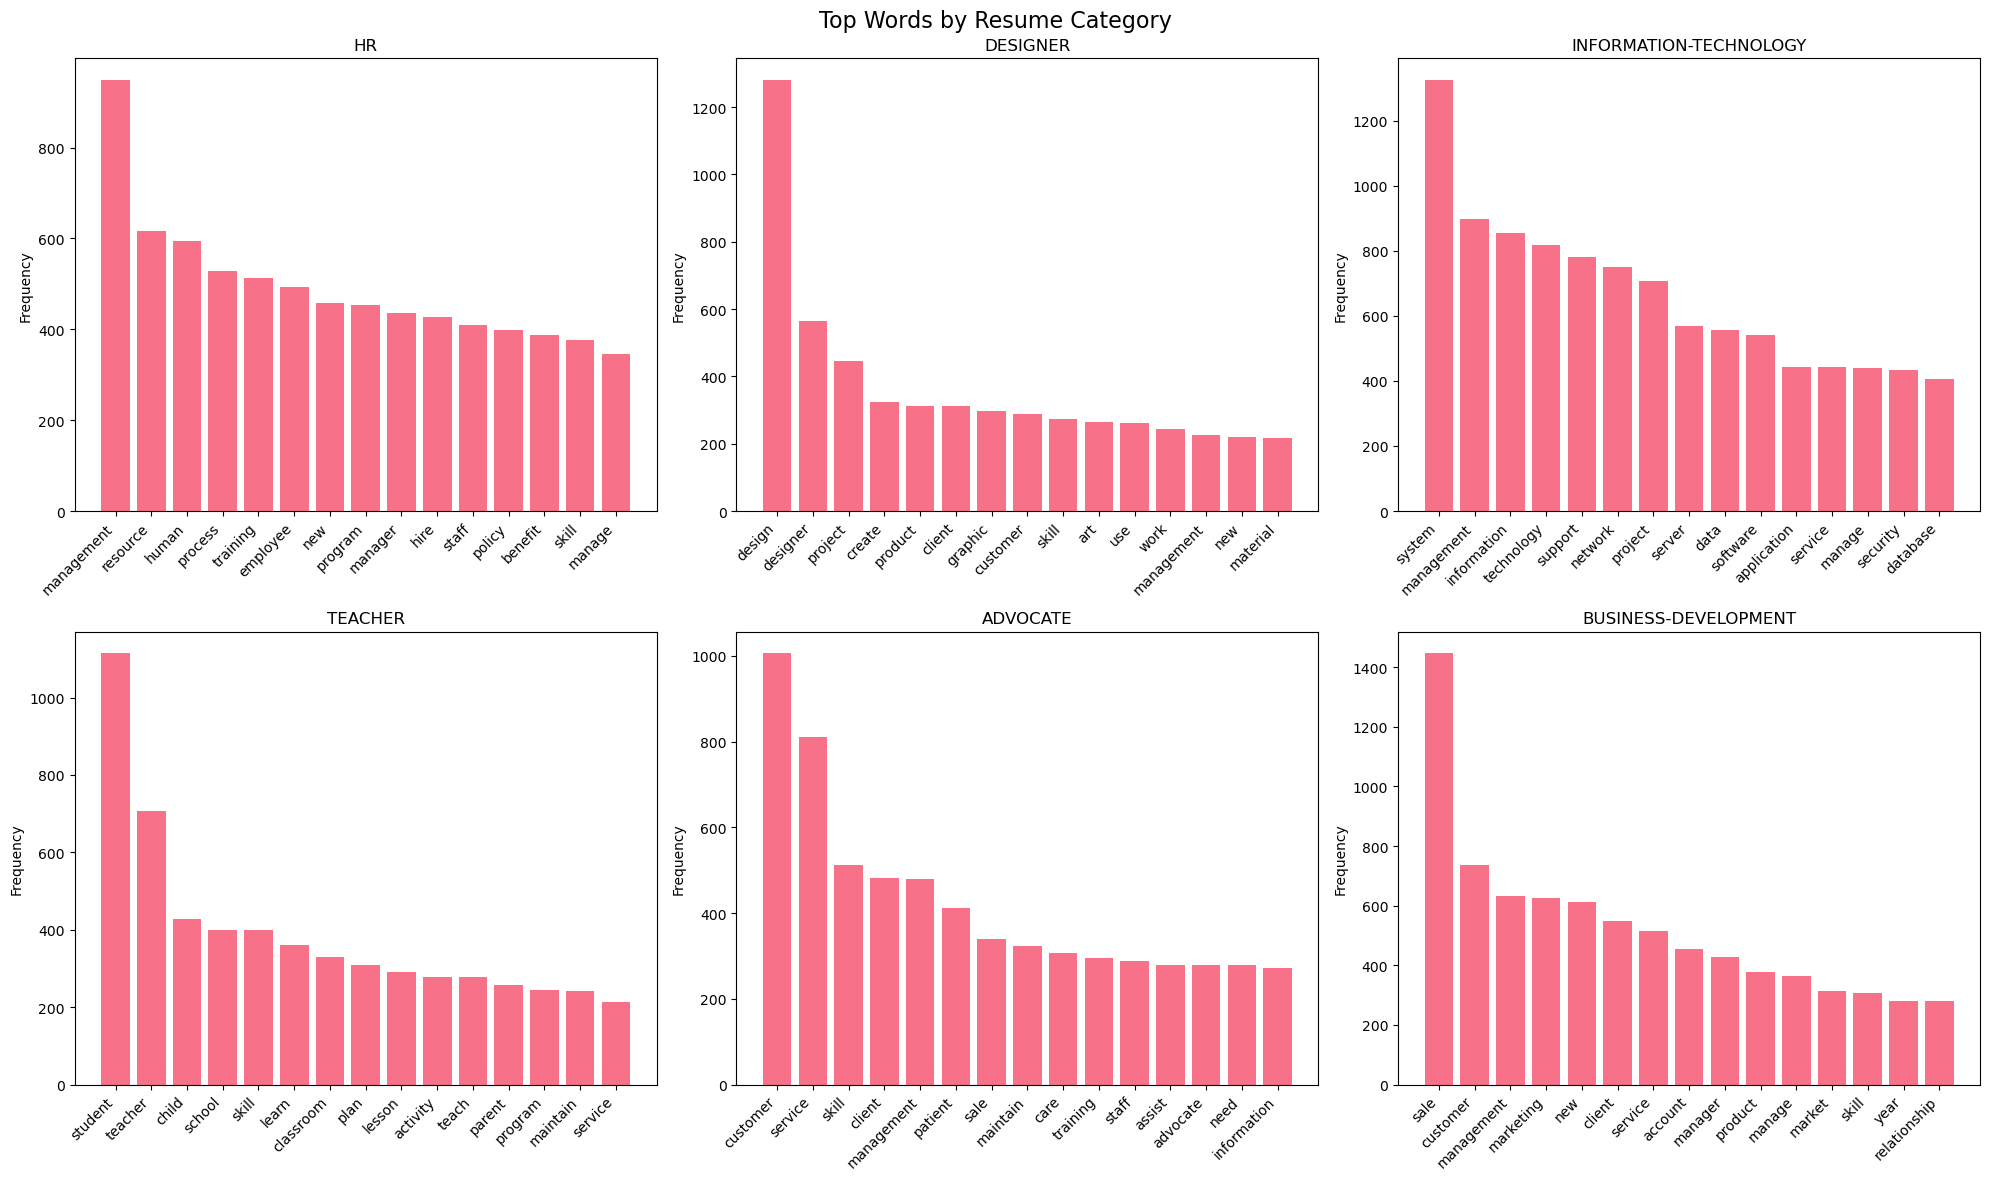

In [17]:
# Visualize word frequencies by category
def plot_word_frequency(word_freq_dict, title):
    n_categories = len(word_freq_dict)
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    for i, (category, word_freq) in enumerate(word_freq_dict.items()):
        if i < len(axes):
            words = [item[0] for item in word_freq]
            freqs = [item[1] for item in word_freq]
            
            axes[i].bar(range(len(words)), freqs)
            axes[i].set_title(f'{category}')
            axes[i].set_xticks(range(len(words)))
            axes[i].set_xticklabels(words, rotation=45, ha='right')
            axes[i].set_ylabel('Frequency')
    
    # Hide unused subplots
    for i in range(len(word_freq_dict), len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot word frequencies by resume category
plot_word_frequency(word_freq_by_category, 'Top Words by Resume Category')

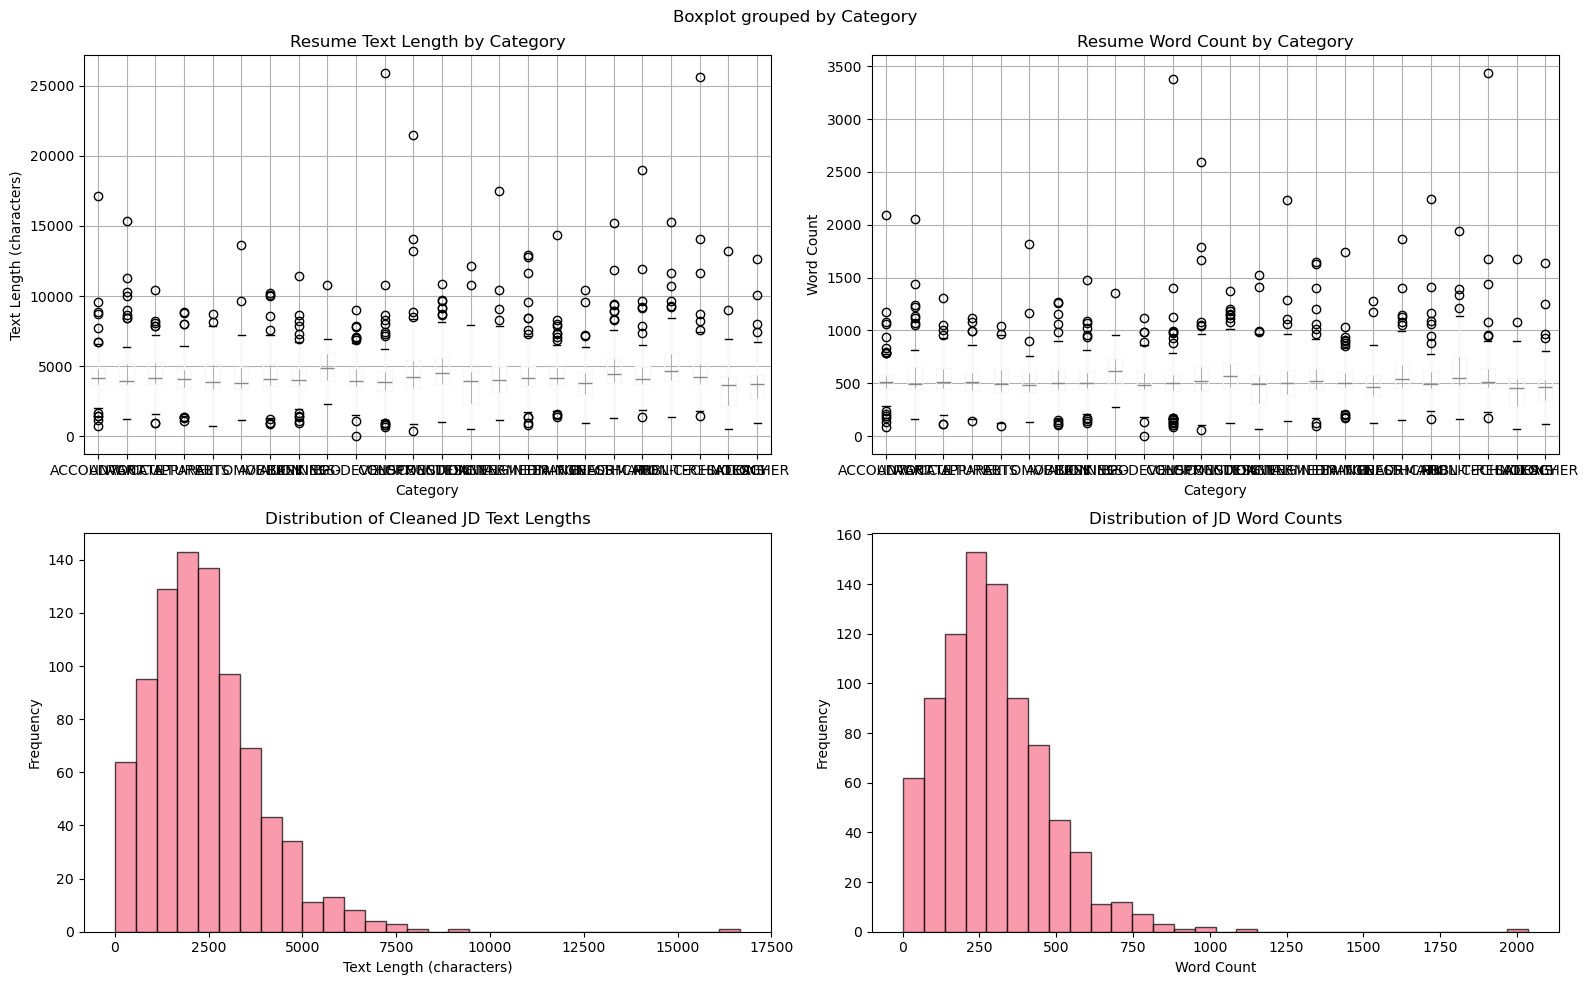

In [18]:
# Text length analysis
resume_df['text_length'] = resume_df['cleaned_resume'].str.len()
resume_df['word_count'] = resume_df['cleaned_resume'].str.split().str.len()

jd_df['cleaned_text_length'] = jd_df['cleaned_job_description'].str.len()
jd_df['word_count'] = jd_df['cleaned_job_description'].str.split().str.len()

# Visualize text statistics
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Resume text length by category
resume_df.boxplot(column='text_length', by='Category', ax=axes[0, 0])
axes[0, 0].set_title('Resume Text Length by Category')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Text Length (characters)')

# Resume word count by category
resume_df.boxplot(column='word_count', by='Category', ax=axes[0, 1])
axes[0, 1].set_title('Resume Word Count by Category')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Word Count')

# JD text length distribution
axes[1, 0].hist(jd_df['cleaned_text_length'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribution of Cleaned JD Text Lengths')
axes[1, 0].set_xlabel('Text Length (characters)')
axes[1, 0].set_ylabel('Frequency')

# JD word count distribution
axes[1, 1].hist(jd_df['word_count'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Distribution of JD Word Counts')
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 🔸 Detyra 2: Përputhja e CV-ve me JD

### TF-IDF Approach

***Niveli:*** Mesatar

***Objektivat:***
- Përdorni TF-IDF ose embeddings për të krahasuar tekstet
- Llogaritni ngjashmërinë ndërmjet CV-ve dhe JD-ve
- Vizualizoni rezultatet

In [19]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8,
    sublinear_tf=True
)

# Combine all texts for fitting the vectorizer
all_texts = list(resume_df['cleaned_resume'].fillna('')) + list(jd_df['cleaned_job_description'].fillna(''))

# Fit the vectorizer on all texts
tfidf_vectorizer.fit(all_texts)

# Transform resume and job description texts
resume_tfidf_matrix = tfidf_vectorizer.transform(resume_df['cleaned_resume'].fillna(''))
jd_tfidf_matrix = tfidf_vectorizer.transform(jd_df['cleaned_job_description'].fillna(''))

print(f"Resume TF-IDF matrix shape: {resume_tfidf_matrix.shape}")
print(f"JD TF-IDF matrix shape: {jd_tfidf_matrix.shape}")

Resume TF-IDF matrix shape: (2484, 5000)
JD TF-IDF matrix shape: (853, 5000)


In [20]:
# Compute cosine similarity between resumes and job descriptions
similarity_matrix_tfidf = cosine_similarity(resume_tfidf_matrix, jd_tfidf_matrix)

print(f"Similarity matrix shape: {similarity_matrix_tfidf.shape}") # A matrix of shape (n_resumes, n_jds) where each entry is in [0,1]
print(f"\nSimilarity matrix statistics:")
print(f"Min similarity: {similarity_matrix_tfidf.min():.4f}")
print(f"Max similarity: {similarity_matrix_tfidf.max():.4f}")
print(f"Mean similarity: {similarity_matrix_tfidf.mean():.4f}")
print(f"Standard deviation: {similarity_matrix_tfidf.std():.4f}")

Similarity matrix shape: (2484, 853)

Similarity matrix statistics:
Min similarity: 0.0000
Max similarity: 0.4307
Mean similarity: 0.0723
Standard deviation: 0.0344


In [21]:
# Function to find top N matching JDs for a given resume
def find_top_jd_matches(resume_idx, n_matches=5):
    similarities = similarity_matrix_tfidf[resume_idx]
    top_indices = np.argsort(similarities)[-n_matches:][::-1]
    
    matches = []
    for idx in top_indices:
        matches.append({
            'jd_idx': idx,
            'similarity': similarities[idx],
            'company': jd_df.iloc[idx]['company_name'],
            'position': jd_df.iloc[idx]['position_title'],
            'description_preview': jd_df.iloc[idx]['job_description'][:200]
        })
    
    return matches

# Function to find top N matching resumes for a given JD
def find_top_resume_matches(jd_idx, n_matches=5):
    similarities = similarity_matrix_tfidf[:, jd_idx]
    top_indices = np.argsort(similarities)[-n_matches:][::-1]
    
    matches = []
    for idx in top_indices:
        matches.append({
            'resume_idx': idx,
            'similarity': similarities[idx],
            'category': resume_df.iloc[idx]['Category'],
            'resume_preview': resume_df.iloc[idx]['Resume_str'][:200]
        })
    
    return matches

In [22]:
# Top 5 JD matches for first few resumes
for i in range(min(3, len(resume_df))):
    print(f"\nResume {i+1} (Category: {resume_df.iloc[i]['Category']}):")
    print(f"Resume preview: {resume_df.iloc[i]['Resume_str'][:150]}")
    
    matches = find_top_jd_matches(i, n_matches=5)
    
    print(f"\nTop 5 matching job descriptions:")
    for j, match in enumerate(matches, 1):
        print(f"{j}. {match['company']} - {match['position']} (Similarity: {match['similarity']:.4f})")
        print(f"   Description: {match['description_preview'][:100]}")


Resume 1 (Category: HR):
Resume preview:          HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in H

Top 5 matching job descriptions:
1. Marriott - Sales Executive Richmond Hotel (Similarity: 0.1800)
   Description: job number job category sales  marketinglocation southern region florida sales  nw  court miami flor
2. Aveda Institutes - Human Resources Generalist (Similarity: 0.1708)
   Description: human resources generalist aveda institutes  loveland oh sign in for commute time quick apply job de
3. PNC Bank - Investment Service Partner – Customer Service Rep – REMOTE OPTION (Similarity: 0.1587)
   Description: position overview

at pnc our people are our greatest differentiator and competitive advantage in th
4. PNC Financial Services Group - Sales Leader I - Business Banking Sales Manager (Similarity: 0.1530)
   Description: job profile

position overview

at pnc our people are our greatest

In [23]:
# Top 5 resume matches for first few JDs
for i in range(min(3, len(jd_df))):
    print(f"\nJob Description {i+1}:")
    print(f"Company: {jd_df.iloc[i]['company_name']}")
    print(f"Position: {jd_df.iloc[i]['position_title']}")
    print(f"Description preview: {jd_df.iloc[i]['job_description'][:150]}...")
    
    matches = find_top_resume_matches(i, n_matches=5)
    
    print(f"\nTop 5 matching resumes:")
    for j, match in enumerate(matches, 1):
        print(f"{j}. Resume {match['resume_idx']+1} - {match['category']} (Similarity: {match['similarity']:.4f})")


Job Description 1:
Company: Google
Position: Sales Specialist
Description preview: minimum qualifications
bachelors degree or equivalent practical experience years of experience in saas or productivity tools businessexperience managi...

Top 5 matching resumes:
1. Resume 1262 - DIGITAL-MEDIA (Similarity: 0.1942)
2. Resume 677 - BUSINESS-DEVELOPMENT (Similarity: 0.1921)
3. Resume 300 - INFORMATION-TECHNOLOGY (Similarity: 0.1835)
4. Resume 1236 - DIGITAL-MEDIA (Similarity: 0.1802)
5. Resume 574 - BUSINESS-DEVELOPMENT (Similarity: 0.1802)

Job Description 2:
Company: Apple
Position: Apple Solutions Consultant
Description preview: description
as an asc you will be highly influential in growing mind and market share of apple products while building longterm relationships with tho...

Top 5 matching resumes:
1. Resume 421 - TEACHER (Similarity: 0.1665)
2. Resume 637 - BUSINESS-DEVELOPMENT (Similarity: 0.1381)
3. Resume 2176 - BANKING (Similarity: 0.1283)
4. Resume 660 - BUSINESS-DEVELOPMENT

Below is shown a visualization of similarity matrix

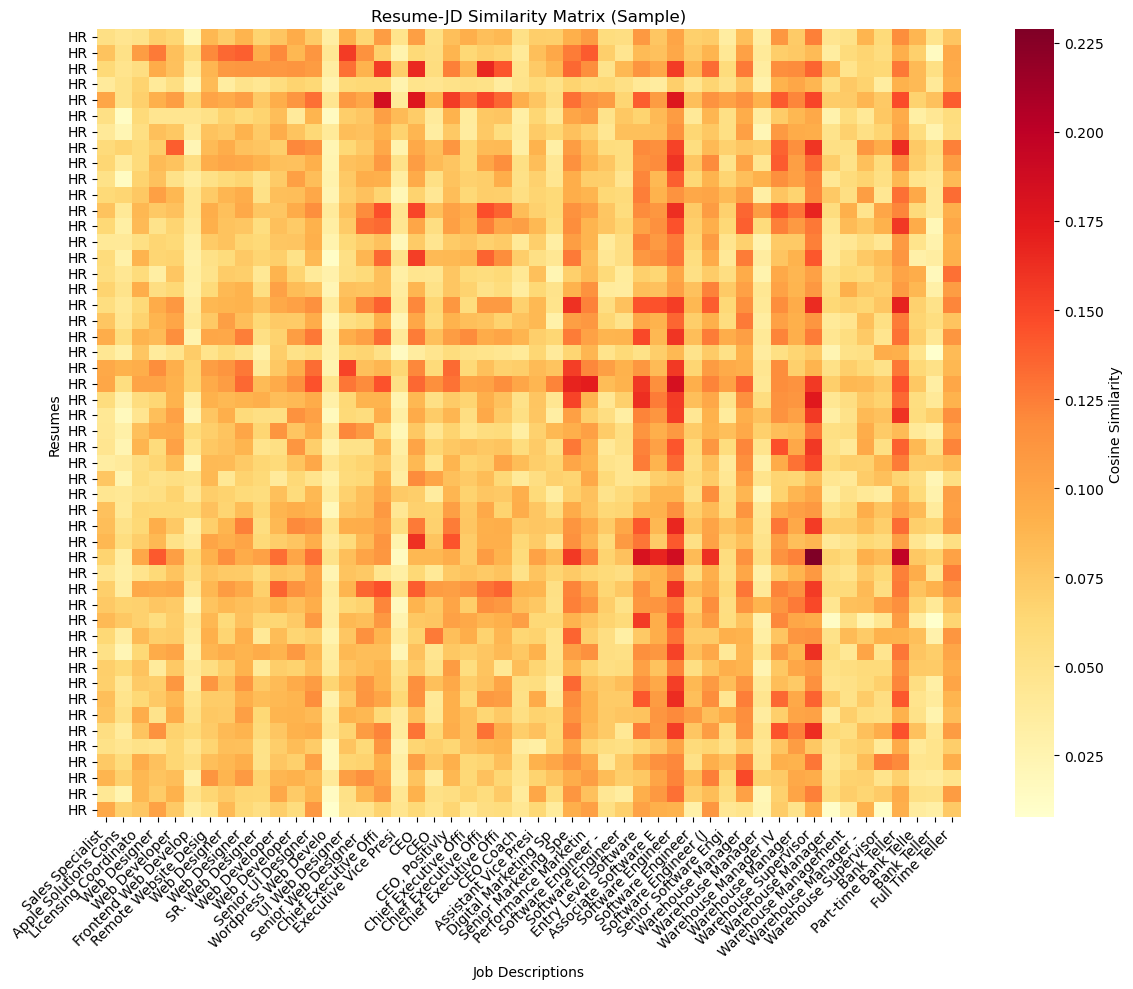

In [24]:
# Create a sample similarity matrix for visualization (first 50 resumes and JDs)
sample_size = min(50, len(resume_df), len(jd_df))
sample_similarity = similarity_matrix_tfidf[:sample_size, :sample_size]

plt.figure(figsize=(12, 10))
sns.heatmap(sample_similarity, 
            xticklabels=jd_df.iloc[:sample_size]['position_title'].str[:20],
            yticklabels=resume_df.iloc[:sample_size]['Category'],
            cmap='YlOrRd',
            cbar_kws={'label': 'Cosine Similarity'})
plt.title('Resume-JD Similarity Matrix (Sample)')
plt.xlabel('Job Descriptions')
plt.ylabel('Resumes')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Now we will do an analysis of match quality by resume category. In other words, it measures per category how similar that category’s resumes tend to be to the JDs they match against. 

In [25]:
# Calculate average similarity scores by resume category
category_similarity_stats = {}
for category in resume_df['Category'].unique():
    category_indices = resume_df[resume_df['Category'] == category].index
    category_similarities = similarity_matrix_tfidf[category_indices]
    
    # Get top 5 matches for each resume in this category
    top_similarities = []
    for idx in range(len(category_indices)):
        top_5_scores = np.sort(category_similarities[idx])[-5:]
        top_similarities.extend(top_5_scores)
    
    category_similarity_stats[category] = {
        'mean_similarity': np.mean(top_similarities),
        'median_similarity': np.median(top_similarities),
        'std_similarity': np.std(top_similarities),
        'max_similarity': np.max(top_similarities),
        'min_similarity': np.min(top_similarities)
    }

# Display results
similarity_comparison_df = pd.DataFrame(category_similarity_stats).T
print("Similarity statistics by category (top 5 matches):")
print(similarity_comparison_df.round(4))

Similarity statistics by category (top 5 matches):
                        mean_similarity  median_similarity  std_similarity  \
HR                               0.2079             0.2030          0.0380   
DESIGNER                         0.1783             0.1769          0.0432   
INFORMATION-TECHNOLOGY           0.2082             0.2089          0.0400   
TEACHER                          0.1825             0.1772          0.0432   
ADVOCATE                         0.1931             0.1878          0.0347   
BUSINESS-DEVELOPMENT             0.1881             0.1871          0.0316   
HEALTHCARE                       0.2069             0.2002          0.0375   
FITNESS                          0.1740             0.1723          0.0344   
AGRICULTURE                      0.1712             0.1669          0.0435   
BPO                              0.1973             0.1912          0.0376   
SALES                            0.1826             0.1794          0.0329   
CONSULTANT   

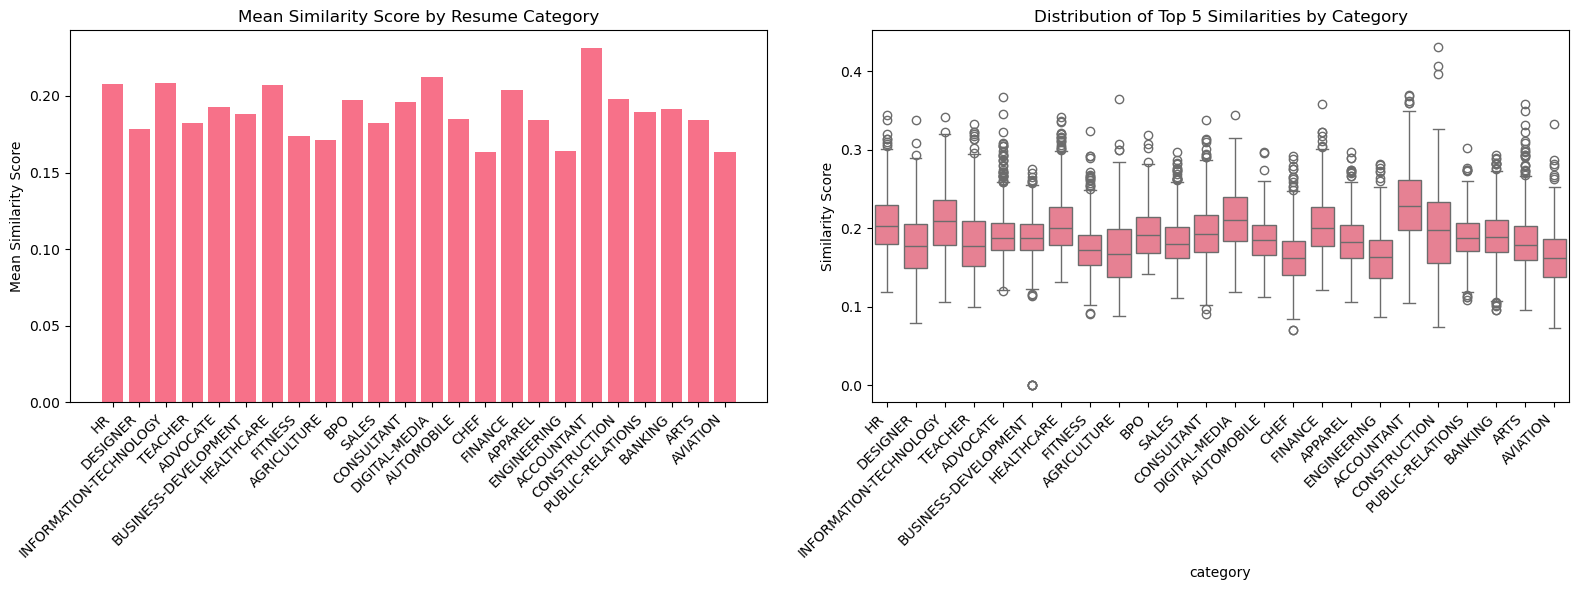

In [26]:
# Visualize match quality by category
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mean similarity by category
categories = list(category_similarity_stats.keys())
mean_similarities = [category_similarity_stats[cat]['mean_similarity'] for cat in categories]

axes[0].bar(categories, mean_similarities)
axes[0].set_title('Mean Similarity Score by Resume Category')
axes[0].set_ylabel('Mean Similarity Score')
axes[0].set_xticklabels(categories, rotation=45, ha='right')

# Distribution of top similarities
all_top_similarities = []
category_labels = []
for category in categories:
    category_indices = resume_df[resume_df['Category'] == category].index
    category_similarities = similarity_matrix_tfidf[category_indices]
    
    for idx in range(len(category_indices)):
        top_5_scores = np.sort(category_similarities[idx])[-5:]
        all_top_similarities.extend(top_5_scores)
        category_labels.extend([category] * len(top_5_scores))

similarity_dist_df = pd.DataFrame({
    'similarity': all_top_similarities,
    'category': category_labels
})

sns.boxplot(data=similarity_dist_df, x='category', y='similarity', ax=axes[1])
axes[1].set_title('Distribution of Top 5 Similarities by Category')
axes[1].set_ylabel('Similarity Score')
axes[1].set_xticklabels(categories, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Now we will do feature importance analysis via TF-IDF weight itself as a proxy for how characteristic a term is of a given category.

The mean TF-IDF score for term _j_ across a category is given by:

$$
\mathrm{mean\_tfidf}_j = \frac{1}{D} \sum_{i=1}^{D} \mathrm{tfidf}_{i,j}
$$

where _D_ is the number of resumes in that category.

However, there exists a premade function to do it and to avoid the silly calculations, so we'll use that.

In [27]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculate average TF-IDF scores for each category
category_tfidf_profiles = {}
for category in resume_df['Category'].unique():
    category_indices = resume_df[resume_df['Category'] == category].index
    category_tfidf = resume_tfidf_matrix[category_indices]
    
    # Calculate mean TF-IDF scores for this category
    mean_tfidf = np.array(category_tfidf.mean(axis=0)).flatten()
    
    # Get top 20 features and then [::-1] to get descending order
    top_feature_indices = np.argsort(mean_tfidf)[-20:][::-1]
    top_features = [(feature_names[idx], mean_tfidf[idx]) for idx in top_feature_indices]
    
    category_tfidf_profiles[category] = top_features
    
    print(f"\nTop 20 TF-IDF features for {category}:")
    for feature, score in top_features:
        print(f"{feature}: {score:.4f}")


Top 20 TF-IDF features for HR:
human resource: 0.0846
human: 0.0771
resource: 0.0609
recruitment: 0.0526
hire: 0.0525
payroll: 0.0525
benefit: 0.0520
employee: 0.0495
new hire: 0.0474
compensation: 0.0452
policy: 0.0448
recruiting: 0.0443
hris: 0.0429
management: 0.0423
performance management: 0.0416
relation: 0.0409
interview: 0.0405
process: 0.0395
resource management: 0.0391
orientation: 0.0390

Top 20 TF-IDF features for DESIGNER:
designer: 0.1218
design: 0.0781
graphic: 0.0556
graphic designer: 0.0459
designer summary: 0.0400
adobe: 0.0373
interior: 0.0360
art: 0.0356
project: 0.0353
create: 0.0339
illustrator: 0.0326
material: 0.0321
drawing: 0.0308
client: 0.0297
photoshop: 0.0293
cad: 0.0287
product: 0.0279
graphic design: 0.0266
autocad: 0.0257
production: 0.0252

Top 20 TF-IDF features for INFORMATION-TECHNOLOGY:
information technology: 0.0878
technology: 0.0651
network: 0.0643
server: 0.0612
hardware: 0.0550
system: 0.0512
information: 0.0484
software: 0.0478
security: 0.04

This was pretty much it with the TF-IDF approach, now let's do a finall overall comparison and save the datasets and the vectorizer model.

In [28]:
# Calculate overall statistics
overall_stats = {
    'total_resumes': len(resume_df),
    'total_jds': len(jd_df),
    'total_comparisons': len(resume_df) * len(jd_df),
    'avg_similarity': similarity_matrix_tfidf.mean(),
    'similarity_std': similarity_matrix_tfidf.std(),
    'high_similarity_pairs': np.sum(similarity_matrix_tfidf > 0.3),
    'very_high_similarity_pairs': np.sum(similarity_matrix_tfidf > 0.5),
    'vocab_size': len(feature_names)
}

print("Overall System Statistics:")
for key, value in overall_stats.items():
    if isinstance(value, float):
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

# Calculate percentage of high similarity matches
high_sim_percentage = (overall_stats['high_similarity_pairs'] / overall_stats['total_comparisons']) * 100
very_high_sim_percentage = (overall_stats['very_high_similarity_pairs'] / overall_stats['total_comparisons']) * 100

print(f"\nMatch Quality Assessment:")
print(f"Pairs with similarity > 0.3: {high_sim_percentage:.2f}%")
print(f"Pairs with similarity > 0.5: {very_high_sim_percentage:.2f}%")

Overall System Statistics:
total_resumes: 2484
total_jds: 853
total_comparisons: 2118852
avg_similarity: 0.0723
similarity_std: 0.0344
high_similarity_pairs: 146
very_high_similarity_pairs: 0
vocab_size: 5000

Match Quality Assessment:
Pairs with similarity > 0.3: 0.01%
Pairs with similarity > 0.5: 0.00%


As anticipated from above, the results aren't that good. So perhaps using a sentance model could lead to better outcomes.

In [29]:
# Save cleaned datasets
resume_df.to_csv('processed_resumes.csv', index=False)
jd_df.to_csv('processed_jds.csv', index=False)

# Save similarity matrix
np.save('similarity_matrix.npy', similarity_matrix_tfidf)

# Save TF-IDF vectorizer
import joblib
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

### Word2Vec Approach

In [30]:
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [31]:
# Prepare tokenized sentences for Word2Vec training
def prepare_word2vec_data(df, text_column): 
    sentences = []
    for text in df[text_column].fillna(''):
        if text:
            # Split into words (already preprocessed)
            words = text.split()
            if words:  # Only add non-empty sentences
                sentences.append(words)
    return sentences

# Prepare data for Word2Vec training
resume_sentences = prepare_word2vec_data(resume_df, 'cleaned_resume')
jd_sentences = prepare_word2vec_data(jd_df, 'cleaned_job_description')

# Combine all sentences for training
all_sentences = resume_sentences + jd_sentences
print(f"Total sentences for training: {len(all_sentences)}")

Total sentences for training: 3336


In [32]:
# Train Word2Vec model
word2vec_model = Word2Vec(
    sentences=all_sentences,
    vector_size=200, # Dimension of word vectors
    window=5, # Context window size
    min_count=2, # Ignore words that appear less than this
    workers=4, # Number of worker threads
    epochs=10, # Number of training epochs
    sg=1 # Use Skip-gram (1) or CBOW (0)
)

print(f"Word2Vec model trained with vocabulary size: {len(word2vec_model.wv.key_to_index)}")

Word2Vec model trained with vocabulary size: 19947


In [33]:
# Function to get document vector by averaging word vectors (we can also use sum, but this is trivial)
def get_document_vector(text, model, vector_size=200):
    if not text:
        return np.zeros(vector_size)
    
    words = text.split()
    word_vectors = []
    
    for word in words:
        if word in model.wv.key_to_index:
            word_vectors.append(model.wv[word])
    
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Convert all resumes and JDs to vectors
resume_vectors = np.array([
    get_document_vector(text, word2vec_model, 200) 
    for text in resume_df['cleaned_resume'].fillna('')
])

jd_vectors = np.array([
    get_document_vector(text, word2vec_model, 200) 
    for text in jd_df['cleaned_job_description'].fillna('')
])

print(f"Resume vectors shape: {resume_vectors.shape}")
print(f"JD vectors shape: {jd_vectors.shape}")

Resume vectors shape: (2484, 200)
JD vectors shape: (853, 200)


In [34]:
# Compute cosine similarity matrix
similarity_matrix_w2v = cosine_similarity(resume_vectors, jd_vectors)

print(f"Similarity matrix shape: {similarity_matrix_w2v.shape}")
print(f"Similarity matrix statistics:")
print(f"Min similarity: {similarity_matrix_w2v.min():.4f}")
print(f"Max similarity: {similarity_matrix_w2v.max():.4f}")
print(f"Mean similarity: {similarity_matrix_w2v.mean():.4f}")
print(f"Standard deviation: {similarity_matrix_w2v.std():.4f}")

Similarity matrix shape: (2484, 853)
Similarity matrix statistics:
Min similarity: 0.0000
Max similarity: 0.9848
Mean similarity: 0.8589
Standard deviation: 0.0651


In [35]:
# Find words similar to some common career terms
test_words = ['manager', 'engineer', 'analyst', 'developer', 'marketing']
for word in test_words:
    if word in word2vec_model.wv.key_to_index:
        similar_words = word2vec_model.wv.most_similar(word, topn=5)
        print(f"Words similar to '{word}': {[w[0] for w in similar_words]}")

Words similar to 'manager': ['reorg', 'superintendant', 'softlines', 'advocare', 'cont']
Words similar to 'engineer': ['drafter', 'estimator', 'osp', 'mechanical', 'surveyor']
Words similar to 'analyst': ['occ', 'evaluator', 'disa', 'evms', 'programmer']
Words similar to 'developer': ['programmer', 'sbm', 'serena', 'infosphere', 'ebusiness']
Words similar to 'marketing': ['marcom', 'offline', 'offchannel', 'advertising', 'omnichannel']


In [36]:
# Save Word2Vec model
word2vec_model.save('word2vec_model.bin')
np.save('resume_vectors.npy', resume_vectors)
np.save('jd_vectors.npy', jd_vectors)
np.save('similarity_matrix_word2vec.npy', similarity_matrix_w2v)

### Comparison

In [37]:
# Comparison of methods
print(f"TF-IDF - Mean: {similarity_matrix_tfidf.mean():.4f}, Max: {similarity_matrix_tfidf.max():.4f}")
print(f"Word2Vec - Mean: {similarity_matrix_w2v.mean():.4f}, Max: {similarity_matrix_w2v.max():.4f}")

TF-IDF - Mean: 0.0723, Max: 0.4307
Word2Vec - Mean: 0.8589, Max: 0.9848


## 🔺 Detyra 3: Ndërtimi i Modelit të Vlerësimit të Talenteve

***Niveli:*** Avancuar


***Objektivat:***
- Përdorni fushat nga `model_response` për të ndërtuar karakteristika të strukturuara
- Zhvilloni një model që jep një vlerësim të përputhshmërisë
- Testoni dhe vlerësoni performancën e modelit